In [90]:
### representing a CSV as a list of rows
#option 1 : each row is a list
csv = [['A1','A2','A3'],
       ['B1','B2','B3']]
#option 2 : each row is a dictionary
csv2 = [{'name1':'A1','name2':'A2','name3':'A3'},
        {'name1':'B1','name2':'B2','name3':'B3'}]

In [91]:
print (csv)
print (csv2)

[['A1', 'A2', 'A3'], ['B1', 'B2', 'B3']]
[{'name1': 'A1', 'name2': 'A2', 'name3': 'A3'}, {'name1': 'B1', 'name2': 'B2', 'name3': 'B3'}]


In [92]:
import unicodecsv

def reader(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
    
enrollments = reader ('enrollments.csv')
daily_engagement = reader ('daily_engagement.csv')
project_submissions = reader ('project_submissions.csv')

print (enrollments[25])
print('================================================')
print (daily_engagement[0])
print('================================================')
print (project_submissions[0])


    
    
    



OrderedDict([('account_key', '584'), ('status', 'current'), ('join_date', '2015-03-10'), ('cancel_date', ''), ('days_to_cancel', ''), ('is_udacity', 'False'), ('is_canceled', 'False')])
OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])
OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


In [93]:
#Fixing Data Types

In [94]:
from datetime import datetime as dt


#Takes date as string and returns Python date time object
#if no date is given, returns none
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date,'%Y-%m-%d')
    
    
def parse_maybe_int(i):
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
    if i == '':
        return None
    else:
        return int(i)
    
def get_unique_students(data):
    unique_students=set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
        
    return unique_students
    




In [95]:
#Fixing dat types

In [96]:
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
    
    
print (enrollments[0])




OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)), ('days_to_cancel', 65), ('is_udacity', True), ('is_canceled', True)])


In [97]:
for engagement in daily_engagement:
    engagement['utc_date'] = parse_date(engagement['utc_date'])
    engagement['num_courses_visited'] = int(float(engagement['num_courses_visited']))
    engagement['lessons_completed'] = int(float(engagement['lessons_completed']))
    engagement['projects_completed'] = int(float(engagement['projects_completed']))
    engagement['total_minutes_visited'] = float(engagement['total_minutes_visited'])
    #engagement['account_key'] = engagement.pop('acct')
    
print (daily_engagement[0])
    
    
    
    

OrderedDict([('acct', '0'), ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0)])


In [98]:
for project in project_submissions:

    project['creation_date'] = parse_date(project['creation_date'])
    project['completion_date'] = parse_date(project['completion_date'])
    #project['account_key'] = parse_maybe_int(project['account_key'])
    #project['lesson_key'] = parse_maybe_int(project['lesson_key'])
    

print (project_submissions[0])

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)), ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


In [99]:
# correct acct to account_key in engagement

In [100]:
for engagement in daily_engagement:
    engagement['account_key'] = engagement['acct']
    del(engagement['acct'])
    

In [101]:
len(enrollments)

1640

In [102]:

## Find the total number of rows and the number of unique students (account keys)
## in each table.

no_of_unique_enrollments = get_unique_students(enrollments)
print("the number of unique students:" + str(len(no_of_unique_enrollments)))

    
    



the number of unique students:1302


In [103]:
len(daily_engagement)

136240

In [104]:


unique_engagement_students = get_unique_students(daily_engagement)
print("the number of unique students:" + str(len(unique_engagement_students)))


the number of unique students:1237


In [105]:

len(project_submissions)



3642

In [106]:
unique_project_submitters = get_unique_students(project_submissions)
print("the number of unique students:" + str(len(unique_project_submitters)))

the number of unique students:743


In [107]:

num_problem_students = 0

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students \
            and enrollment['join_date'] != enrollment['cancel_date']:
        num_problem_students += 1
        print(enrollment)
        
        
print(num_problem_students)
        #if enrollment['status'] != 'canceled':
            #print(enrollment)
    
    
    

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])
3


In [108]:
#Creating a set with all udacity test accounts

In [109]:
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)


6

In [110]:
#Remove udacity test accounts
len(daily_engagement)
print(daily_engagement[365])

OrderedDict([('utc_date', datetime.datetime(2015, 6, 30, 0, 0)), ('num_courses_visited', 0), ('total_minutes_visited', 0.0), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '2')])


In [111]:
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data
            
        

In [112]:
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print("the udacity real enrollment accounts:" + str(len(non_udacity_enrollments)))
print("the udacity real engagement accounts:" + str(len(non_udacity_engagement)))
print("the udacity real submission accounts:" + str(len(non_udacity_submissions)))
#len(non_udacity_enrollments)
#len(non_udacity_engagement)
#len(non_udacity_submissions)

the udacity real enrollment accounts:1622
the udacity real engagement accounts:135656
the udacity real submission accounts:3634


In [113]:
#How do numbers in the engagement table differ for students who pass the first project

In [114]:
paid_students = {}
#account_keys=[]
#enrollment_date=[]
unique_keys =set()
for enrollmentu in non_udacity_enrollments:
    if enrollmentu['days_to_cancel'] == None or enrollmentu['days_to_cancel'] > 7:
        account_keys = enrollmentu['account_key']
        #unique_keys.add(enrollmentu['account_key'])
        enrollment_date = (enrollmentu['join_date'])
        if account_keys not in paid_students or enrollment_date > paid_students[account_keys]:
            paid_students[account_keys]=enrollment_date
len(paid_students)



995

In [115]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [116]:
# Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.


def remove_free_trials_cancel(data_list):
    new_data_list = []
    for data in data_list:
        if data['account_key'] in paid_students:
            # and within_one_week(paid_students[student],non_udacity_engagement['utc_date']):
            new_data_list.append(data)
    return new_data_list






In [117]:
paid_enrollment = remove_free_trials_cancel(non_udacity_enrollments)
paid_engagement = remove_free_trials_cancel(non_udacity_engagement)
paid_submission = remove_free_trials_cancel(non_udacity_submissions)

print(len(paid_enrollment))
print(len(paid_engagement))
print(len(paid_submission))

1293
134549
3618


In [118]:
for engagement in paid_engagement:
    if engagement['num_courses_visited'] > 0:
        engagement['has_visited'] = 1
    else:
        engagement['has_visited'] = 0

In [119]:
paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    if within_one_week(paid_students[account_key],engagement_record['utc_date']):
        paid_engagement_in_first_week.append(engagement_record)
len(paid_engagement_in_first_week)
    

6919

In [120]:
#Exploring student engagement
from pprint import pprint

from collections import defaultdict
# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
    
#pprint(engagement_by_account['108'])

In [121]:
from pprint import pprint
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)


total_mins_by_account={}
for account_key, engagement_each_student in engagement_by_account.items():
    total_mins = 0
    for engagement in engagement_each_student:
        total_mins+=engagement['total_minutes_visited']
    total_mins_by_account[account_key] = total_mins
    
#print(total_mins_by_account)    
#for key,values in total_mins_by_account.items():
#    if values > 1000:
#          print(key,values)
        
#108 10568.100867332541

In [122]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_mins = list(total_mins_by_account.values())
print ('Mean:', np.mean(total_mins))
print ('Standard deviation:', np.std(total_mins))
print ('Minimum:', np.min(total_mins))
print ('Maximum:', np.max(total_mins))

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


In [123]:
def total_by_account(key_name):
    total_by_account={}
    for account_key, engagement_each_student in engagement_by_account.items():
        total = 0
        for engagement in engagement_each_student:
            total+=engagement[key_name]
            total_by_account[account_key] = total
#statistics(total_by_account)
    return total_by_account

In [124]:
def statistics(data):
    total = list(data.values())
    print ('Mean:', np.mean(total))
    print ('Standard deviation:', np.std(total))
    print ('Minimum:', np.min(total))
    print ('Maximum:', np.max(total))
    

In [125]:
#from pprint import pprint
#from collections import defaultdict
#Exploring student engagement
#def group_data(paid_engagement_in_first_week):
    # Create a dictionary of engagement grouped by student.
    # The keys are account keys, and the values are lists of engagement records.
#    engagement_by_account = defaultdict(list)
#    for engagement_record in paid_engagement_in_first_week:
#        account_key = engagement_record['account_key']
#        engagement_by_account[account_key].append(engagement_record)

In [126]:
#lessons completed in first week

In [127]:
lessons_completed_per_student = total_by_account('lessons_completed')
#pprint(lessons_completed_per_student)
(statistics(lessons_completed_per_student))

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


In [128]:
#Minuites completed by student in first week

In [129]:
mins_completed_per_student = total_by_account('total_minutes_visited')
(statistics(mins_completed_per_student))

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


In [130]:
#Projects completed by student in first week

In [131]:
mins_completed_per_student = total_by_account('projects_completed')
(statistics(mins_completed_per_student))


Mean: 0.00603015075377
Standard deviation: 0.0894641732031
Minimum: 0
Maximum: 2


In [132]:
days_visited_by_account = total_by_account('has_visited')
(statistics(days_visited_by_account))

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


In [162]:
#redo

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passing_engagement = []
non_passing_engagement = []
subway_submissions_passed=set()
subway_submissions_othered=set()


#for account_key, engagement_each_student in engagement_by_account.items():
 #   pprint(engagement_each_student)
for submission in paid_submission:
    if submission['lesson_key'] in subway_project_lesson_keys:
        if submission['assigned_rating'] == 'PASSED' or submission['assigned_rating'] == 'DISTINCTION':
            subway_submissions_passed.add(submission['account_key'])
        else:
            subway_submissions_othered.add(submission['account_key'])
            
print("those who passed:"+ str(len(subway_submissions_passed)))
print("those who did not passed:" + str(len(subway_submissions_othered)))
            
for account_key, engagement_each_student in engagement_by_account.items():
    for engagement in engagement_each_student:
        if engagement['account_key'] in subway_submissions_passed:
            passing_engagement.append(engagement)
        else:
            non_passing_engagement.append(engagement)
            
        #if engagement['account_key'] in subway_submissions_othered:
         #   non_passing_engagement.append(engagement)
            
            
        
print(len(passing_engagement))
print(len(non_passing_engagement))

        

those who passed:647
those who did not passed:481
4527
2392


In [171]:
#Total Minutes spent by students who pass and students who dont pass
total_time=0
for students in passing_engagement:
    #print(students['total_minutes_visited'])
    account_key = students['account_key']
    if within_one_week(paid_students[account_key],students['utc_date']):
        total_time = total_time + students['total_minutes_visited']
print(total_time)



days_visited_by_account = total_by_account('total_minutes_visited')
(statistics(days_visited_by_account))




255297.1720748305
Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


(array([ 3.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1.  ,  1.15,  1.3 ,  1.45,  1.6 ,  1.75,  1.9 ,  2.05,  2.2 ,
         2.35,  2.5 ,  2.65,  2.8 ,  2.95,  3.1 ,  3.25,  3.4 ,  3.55,
         3.7 ,  3.85,  4.  ]),
 <a list of 20 Patch objects>)

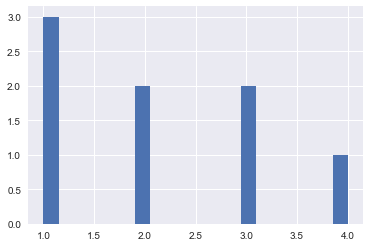

In [3]:
#making histogram
import seaborn as sns
import matplotlib.pyplot as plt

data= [1,2,1,3,3,1,4,2]
%matplotlib inline


plt.hist(data, bins=20) 






(array([ 3.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

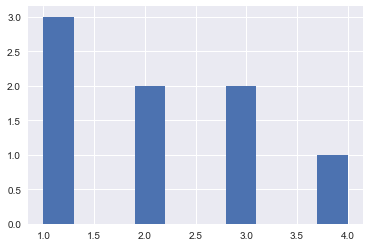

In [4]:
plt.hist(data)